In [32]:
import pandas as pd
from sqlalchemy import create_engine, text
engine = create_engine('postgresql://postgres@db:5432/postgres')


In [47]:

# query = "SELECT feature_result_id FROM backend_step_result where step_result_id = 5411158"
# df = pd.read_sql(query, engine)
# df

step_result_id = 5411158


query = """
SELECT sr.step_name, fr.feature_id_id FROM 
backend_step_result sr join backend_feature_result fr 
on fr.feature_result_id= sr.feature_result_id
WHERE sr.step_result_id = :step_result_id
"""


# Get feature_result_id directly using SQLAlchemy
with engine.connect() as connection:
    query = text(query)
    result = connection.execute(query, {"step_result_id": step_result_id}).fetchone()
    step_name = result[0] if result else None
    feature_id = result[1] if result else None

print(step_name,feature_id)

StartBrowser and call URL "$crisy_pro_pre_homepage" 1062


In [2]:
query = "SELECT fr.feature_result_id, fr.success FROM backend_feature_result fr where fr.feature_id_id = 1062 and fr.success = 'True'"
df = pd.read_sql(query, engine)
df

query = "SELECT fr.feature_result_id, fr.success FROM backend_feature_result fr where fr.feature_id_id = 1062 and fr.success = 'True'"
df = pd.read_sql(query, engine)
df




step_result_id = 5411158


query = """SELECT fr.feature_result_id, fr.success FROM backend_feature_result fr where fr.feature_id_id = :feature_id"""


# Get feature_result_id directly using SQLAlchemy
with engine.connect() as connection:
    query = text(query)
    result = connection.execute(query, {"step_result_id": step_result_id}).fetchone()
    feature_result_id = result[0] if result else None
    feature_id = result[1] if result else None

print(feature_result_id,feature_id)




,feature_result_id,success
0,437814,True
1,437831,True
2,437834,True
3,437853,True
4,437862,True
...,...,...
6334,456735,True
6335,456738,True
6336,456739,True
6337,456745,True


In [49]:
import pandas as pd
from datetime import datetime, timedelta

# # Input values
# step_name = 'wait until I can see "Download Template" on page'
# feature_id = 1062

# Optional: Pass start_date and end_date (or leave them as None)
start_date = None
end_date = None

# If not provided, default to: now - 30 days → now
if not end_date:
    end_date = datetime.utcnow()  # includes current time
if not start_date:
    start_date = end_date - timedelta(days=30)

# Format as full ISO timestamps (PostgreSQL-compatible)
start_date = start_date.isoformat()
end_date = end_date.isoformat()

# SQL query using full timestamps
query = """
SELECT sr.execution_time, sr.success, sr.status, fr.result_date
FROM backend_step_result sr
LEFT JOIN backend_feature_result fr
  ON sr.feature_result_id = fr.feature_result_id
WHERE fr.feature_id_id = %s
  AND sr.step_name = %s
  AND fr.result_date BETWEEN %s AND %s
ORDER BY fr.result_date;
"""

params = (feature_id, step_name, start_date, end_date)

# Run the query
df = pd.read_sql(query, engine, params=params)
df

,execution_time,success,status,result_date
0,3739,True,Success,2025-03-10 13:05:00.096831+00:00
1,2709,True,Success,2025-03-10 14:05:00.127209+00:00
2,2170,True,Success,2025-03-10 15:05:00.066903+00:00
3,694,True,Success,2025-03-10 16:05:00.074132+00:00
4,1880,True,Success,2025-03-10 17:05:00.115780+00:00
...,...,...,...,...
221,2561,True,Success,2025-04-03 16:05:00.120161+00:00
222,619,True,Success,2025-04-03 17:05:00.122712+00:00
223,2427,True,Success,2025-04-03 18:05:00.104815+00:00
224,1825,True,Success,2025-04-03 19:05:00.118674+00:00


In [52]:
total_execution_time = df['execution_time'].sum()
average_execution_time = df['execution_time'].mean()
min_exec = df['execution_time'].min()
max_exec = df['execution_time'].max()
median_exec = df['execution_time'].median()
total_tests = len(df)
failed_tests = len(df[df['success'] == False])

summary = {
    "total_execution_time":
    
}



print("📊 Execution Statistics:")
print(f"Total Execution Time: {total_execution_time} ms")
print(f"Average Execution Time: {average_execution_time:.2f} ms")
print(f"Min Execution Time: {min_exec:.2f} ms")
print(f"Max Execution Time: {max_exec:.2f} ms")
print(f"Median Execution Time: {median_exec:.2f} ms")
print(f"Total Steps: {total_tests}")
print(f"Failed Steps: {failed_tests}")


📊 Execution Statistics:
Total Execution Time: 478553 ms
Average Execution Time: 2117.49 ms
Min Execution Time: 485.00 ms
Max Execution Time: 5196.00 ms
Median Execution Time: 2068.00 ms
Total Steps: 226
Failed Steps: 0


In [76]:
import matplotlib.pyplot as plt

In [106]:
filter_data = {}

step_result_id = 5411295


query = """
SELECT sr.step_name, fr.feature_id_id FROM 
backend_step_result sr join backend_feature_result fr 
on fr.feature_result_id= sr.feature_result_id
WHERE sr.step_result_id = :step_result_id
"""


# Get feature_result_id directly using SQLAlchemy
with engine.connect() as connection:
    query = text(query)
    result = connection.execute(query, {"step_result_id": step_result_id}).fetchone()
    step_name = result[0] if result else None
    feature_id = result[1] if result else None

print(step_name,feature_id)

# # Optional: Pass start_date and end_date (or leave them as None)
# start_date = None
# end_date = None

# If not provided, default to: now - 30 days → now
# if not end_datetime:
#     end_datetime = datetime.utcnow()  # includes current time
# if not start_datetime:
#     start_datetime = end_datetime - timedelta(days=30)


end_datetime = filter_data.get("end_datetime",  datetime.utcnow())
start_datetime = filter_data.get("start_datetime", end_datetime - timedelta(days=30))
group_by = filter_data.get("group_by","Hour")

print(start_datetime, end_datetime, group_by)


# Format as full ISO timestamps (PostgreSQL-compatible)
start_datetime = start_datetime.isoformat()
end_datetime = end_datetime.isoformat()

# SQL query using full timestamps
query = """
SELECT sr.execution_time, sr.success, sr.status, fr.result_date
FROM backend_step_result sr
LEFT JOIN backend_feature_result fr
ON sr.feature_result_id = fr.feature_result_id
WHERE fr.feature_id_id = %s
AND sr.step_name = %s
AND fr.result_date BETWEEN %s AND %s
ORDER BY fr.result_date;
"""

params = (feature_id, step_name, start_datetime, end_datetime)

# Run the query
df = pd.read_sql(query, engine, params=params)
df

group_by_mapping = {"Hours":"H","Day":"D","Week":"W","Month":"M","Hour":"H"}


group_by_pattern = group_by_mapping.get(group_by, None)

print(start_datetime, end_datetime, group_by_pattern)

df['result_date'] = pd.to_datetime(df['result_date'])	
#Convert to datetime
df = df.set_index('result_date')

if group_by_pattern:
    # Grouping by day
    graph_data = df.resample(group_by_pattern)['execution_time'].sum()
else:
    graph_data = df



# Calculate summary statistics
summary = {
    "total_execution_time": float(df['execution_time'].sum()),
    "average_execution_time": float(df['execution_time'].mean()),
    "min_execution_time": float(df['execution_time'].min()),
    "max_execution_time": float(df['execution_time'].max()),
    "median_execution_time": float(df['execution_time'].median()),
    "standard_deviation": float(df['execution_time'].std()),
    "total_tests": len(df),
    "failed_tests": len(df[df['success'] == False]),
    "success_rate": float(len(df[df['success'] == True]) / len(df) * 100) if len(df) > 0 else 0,
    "status_distribution": df['status'].value_counts().to_dict()
}
summary

wait until I can see "Download Template" on page 1062
2025-03-09 20:06:26.637065 2025-04-08 20:06:26.637065 Hour
2025-03-09T20:06:26.637065 2025-04-08T20:06:26.637065 H


{'total_execution_time': 1373838.0,
 'average_execution_time': 3108.230769230769,
 'min_execution_time': 28.0,
 'max_execution_time': 10001.0,
 'median_execution_time': 52.5,
 'standard_deviation': 4599.908959579604,
 'total_tests': 442,
 'failed_tests': 136,
 'success_rate': 69.23076923076923,
 'status_distribution': {'Success': 306, 'Failed': 136}}

<Axes: title={'center': 'Total Step Duration per Day'}, xlabel='Result Execution Dates (Hour)', ylabel='Execution Time (ms)'>

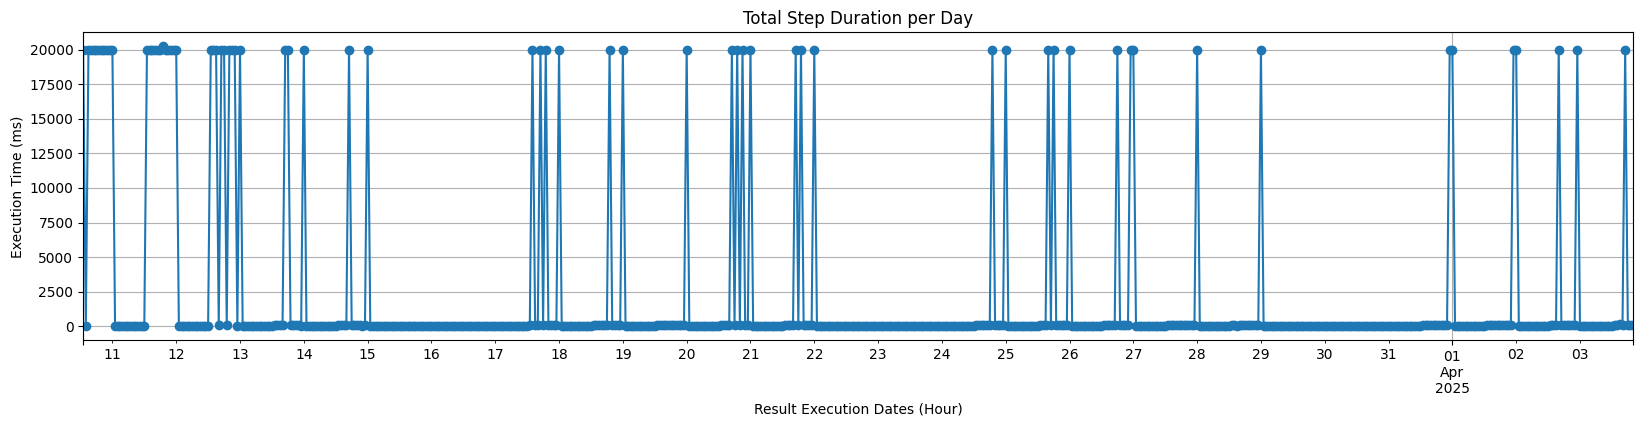

In [107]:
plt.figure(figsize=(20, 4))
graph_data.plot(title='Total Step Duration per Day', marker='o', ylabel='Execution Time (ms)', xlabel=f"Result Execution Dates ({group_by})", grid=True)

In [ ]:
totals = df.resample('D').size()
failed = df[df['success'] == False].resample('D').size()
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(daily_total.index, daily_total, label='Total Tests (Daily)', marker='o')
plt.plot(daily_failed.index, daily_failed, label='Failed Tests (Daily)', marker='x', linestyle='--', color='red')

plt.title("Test Session Frequency (Daily) with Failures")
plt.xlabel("Date")
plt.ylabel("Number of Tests")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [25]:
df['result_date'] = pd.to_datetime(df['result_date'])
df.set_index('result_date', inplace=True)

In [26]:
# Grouping by day
daily_totals = df.resample('D')['execution_time'].sum()

# Grouping by week
weekly_totals = df.resample('W')['execution_time'].sum()

# Grouping by month
monthly_totals = df.resample('M')['execution_time'].sum()


In [27]:
daily_totals.max()

240239

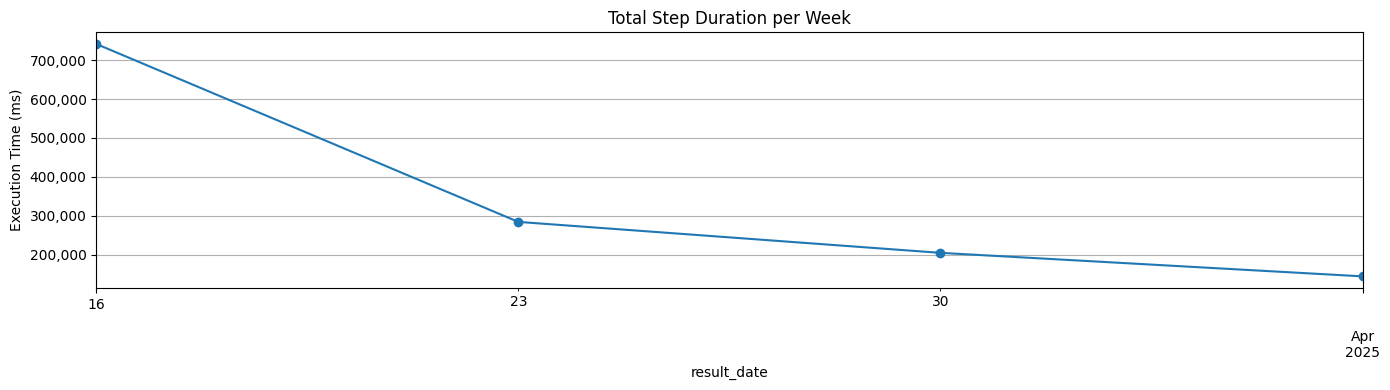

In [28]:
import matplotlib.ticker as ticker

ax = weekly_totals.plot(figsize=(14, 4), title='Total Step Duration per Week', marker='o', grid=True)
ax.set_ylabel('Execution Time (ms)')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  # force thousands with comma
plt.tight_layout()
plt.show()

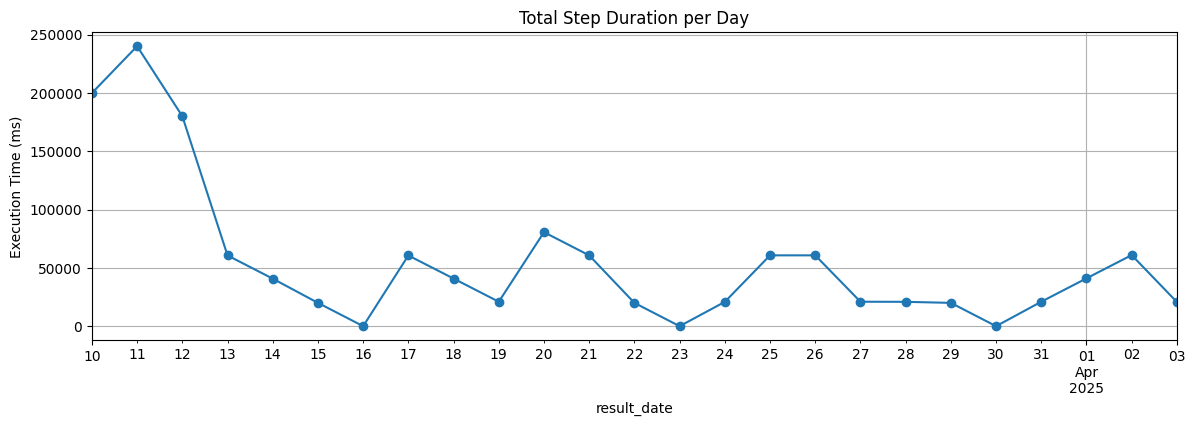

In [29]:
daily_totals.plot(figsize=(14, 4), title='Total Step Duration per Day', marker='o', ylabel='Execution Time (ms)', grid=True)
plt.show()


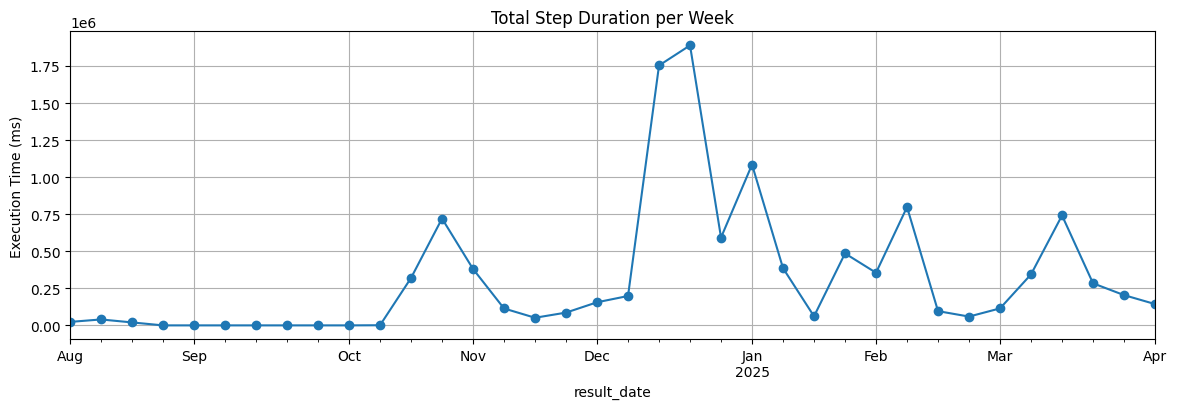

In [13]:
weekly_totals.plot(figsize=(14, 4), title='Total Step Duration per Week',marker='o', ylabel='Execution Time (ms)', grid=True)
plt.show()


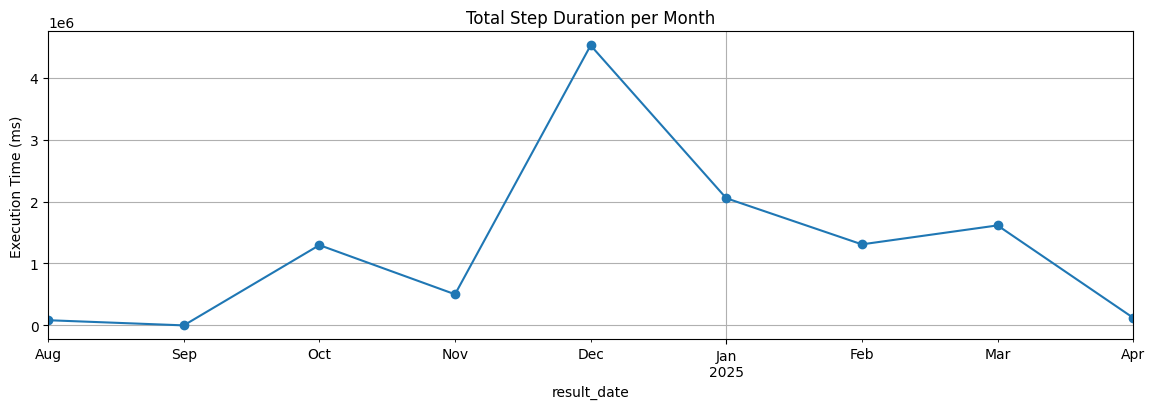

In [67]:
monthly_totals.plot(figsize=(14, 4), title='Total Step Duration per Month', marker='o', ylabel='Execution Time (ms)', grid=True)
plt.show()


In [ ]:
# Total Test Session Frequencies

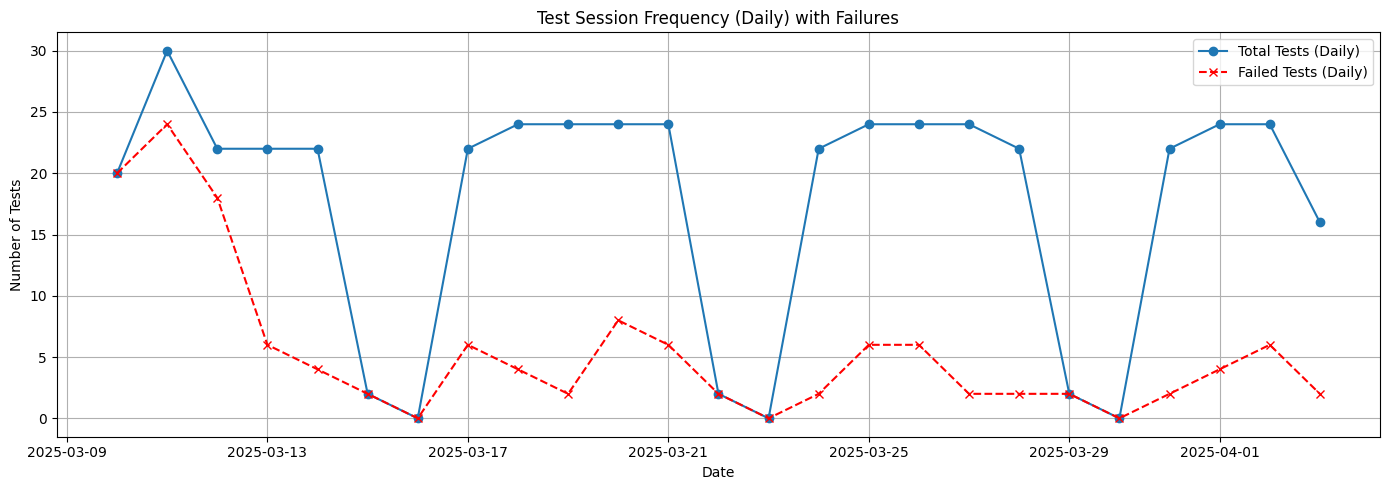

In [108]:
daily_total = df.resample('D').size()
daily_failed = df[df['success'] == False].resample('D').size()
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(daily_total.index, daily_total, label='Total Tests (Daily)', marker='o')
plt.plot(daily_failed.index, daily_failed, label='Failed Tests (Daily)', marker='x', linestyle='--', color='red')

plt.title("Test Session Frequency (Daily) with Failures")
plt.xlabel("Date")
plt.ylabel("Number of Tests")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Creating test frequency graph
Total tests: 25, Failed tests: 25


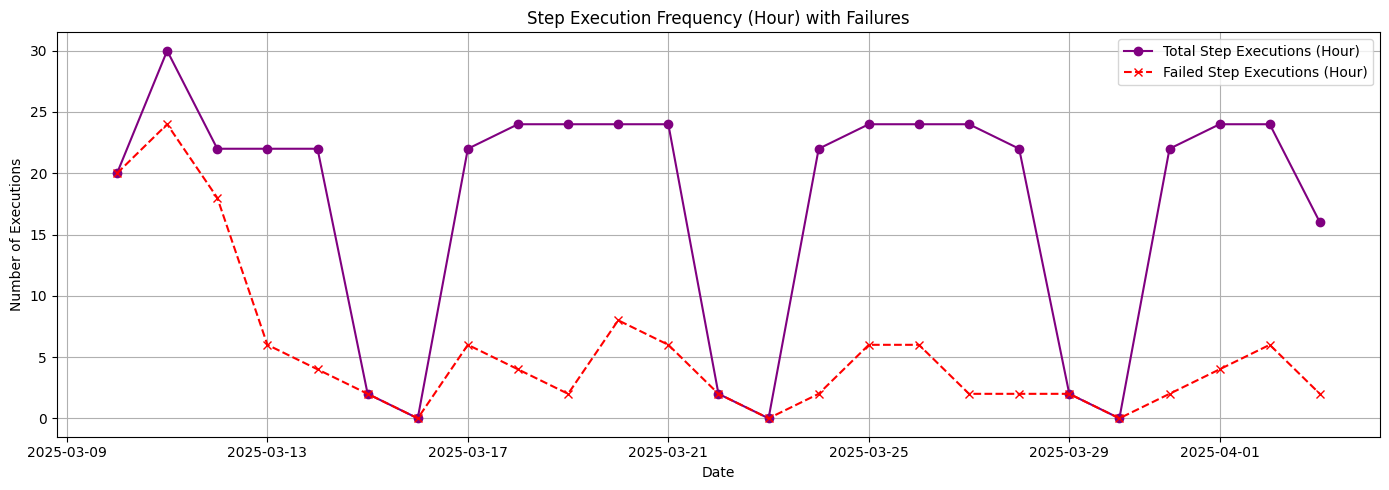

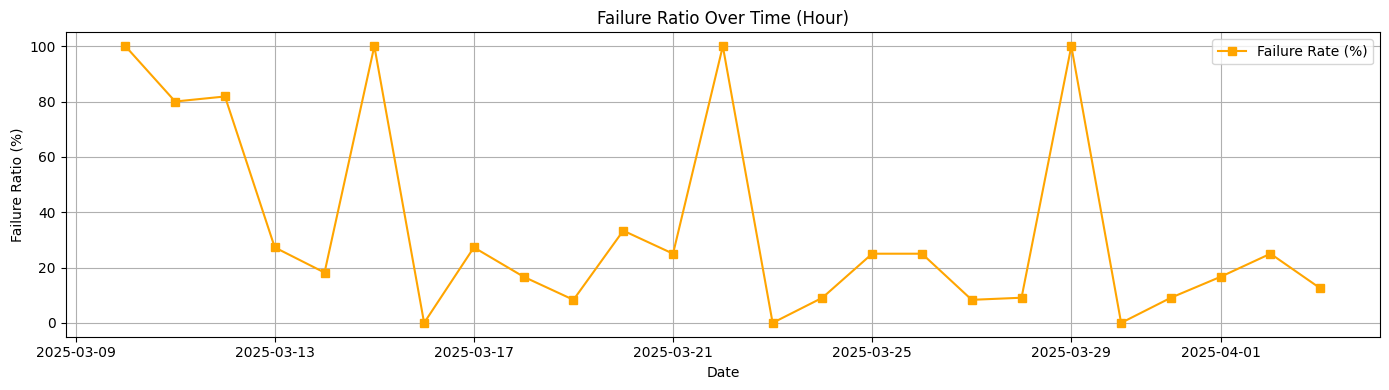

In [109]:
import matplotlib.pyplot as plt

print("Creating test frequency graph")    
data_frame = df
# Total and failed executions grouped by day (or any frequency)
totals = data_frame.resample('D').size()
failed = data_frame[data_frame['success'] == False].resample('D').size()

print(f"Total tests: {len(totals)}, Failed tests: {len(failed)}")

# Calculate failure ratio (NaNs from divide-by-zero will be handled)
failed_ratio = (failed / totals).fillna(0)  # or multiply by 100 for percentage

# Plot total and failed executions
plt.figure(figsize=(14, 5))
plt.plot(totals.index, totals, label=f'Total Step Executions ({group_by})', marker='o', color='purple')
plt.plot(failed.index, failed, label=f'Failed Step Executions ({group_by})', marker='x', linestyle='--', color='red')

plt.title(f"Step Execution Frequency ({group_by}) with Failures")
plt.xlabel("Date")
plt.ylabel("Number of Executions")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot the failure ratio separately
plt.figure(figsize=(14, 4))
plt.plot(failed_ratio.index, failed_ratio * 100, label='Failure Rate (%)', color='orange', marker='s')
plt.title(f"Failure Ratio Over Time ({group_by})")
plt.xlabel("Date")
plt.ylabel("Failure Ratio (%)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


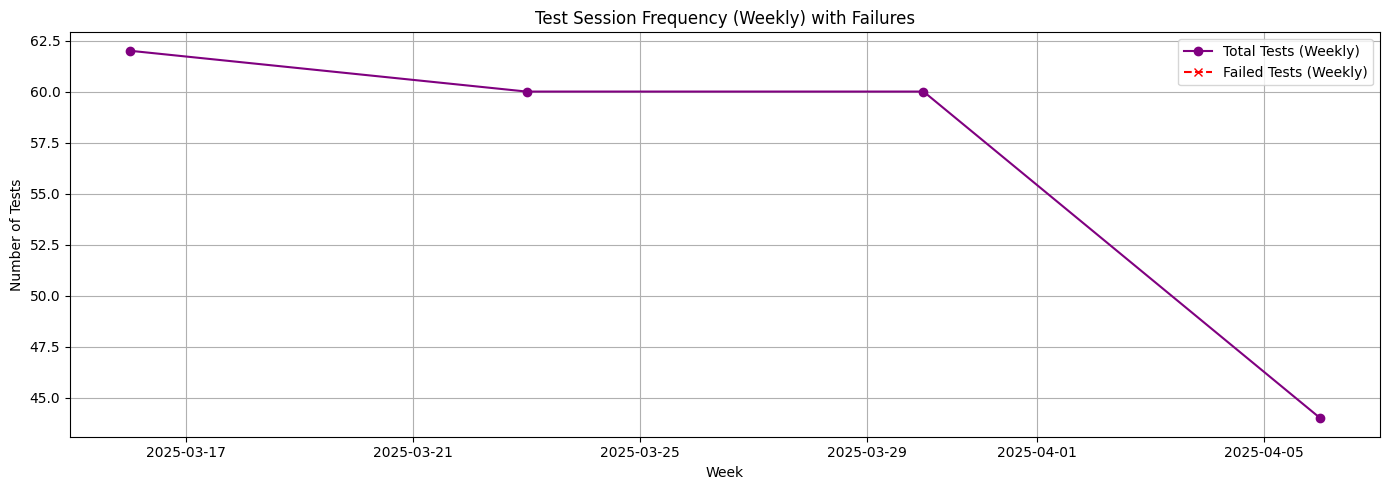

In [98]:
weekly_total = df.resample('W').size()
weekly_failed = df[df['success'] == False].resample('W').size()

plt.figure(figsize=(14, 5))
plt.plot(weekly_total.index, weekly_total, label='Total Tests (Weekly)', marker='o',color='purple')
plt.plot(weekly_failed.index, weekly_failed, label='Failed Tests (Weekly)', marker='x', linestyle='--', color='red')

plt.title("Test Session Frequency (Weekly) with Failures")
plt.xlabel("Week")
plt.ylabel("Number of Tests")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



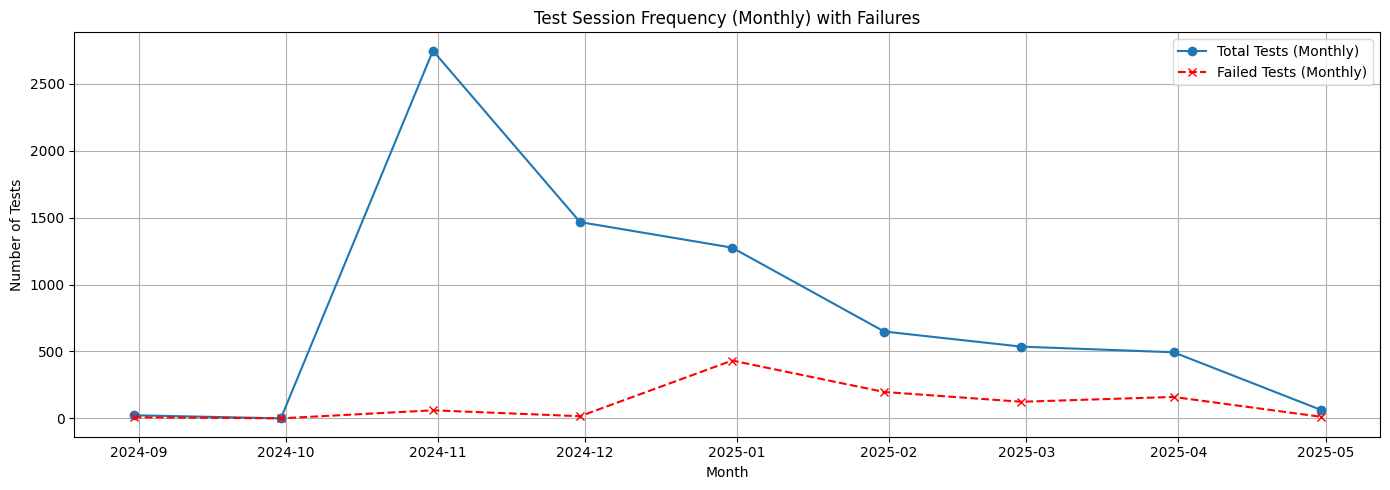

In [75]:
monthly_total = df.resample('M').size()
monthly_failed = df[df['success'] == False].resample('M').size()


plt.figure(figsize=(14, 5))
plt.plot(monthly_total.index, monthly_total, label='Total Tests (Monthly)', marker='o')
plt.plot(monthly_failed.index, monthly_failed, label='Failed Tests (Monthly)', marker='x', linestyle='--', color='red')

plt.title("Test Session Frequency (Monthly) with Failures")
plt.xlabel("Month")
plt.ylabel("Number of Tests")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [50]:
df['result_date'] = pd.to_datetime(df['result_date'])  # ensures it's in datetime format
df.set_index('result_date', inplace=True)


In [51]:
daily = df.resample('D').agg({
    'execution_time': ['mean', 'min', 'max'],
    'success': lambda x: (x == False).sum()
})
daily.columns = ['avg_execution', 'min_execution', 'max_execution', 'failures']


In [52]:
weekly = df.resample('W').agg({
    'execution_time': ['mean', 'min', 'max'],
    'success': lambda x: (x == False).sum()
})
weekly.columns = ['avg_execution', 'min_execution', 'max_execution', 'failures']


In [53]:
monthly = df.resample('M').agg({
    'execution_time': ['mean', 'min', 'max'],
    'success': lambda x: (x == False).sum()
})
monthly.columns = ['avg_execution', 'min_execution', 'max_execution', 'failures']


In [54]:
time = weekly

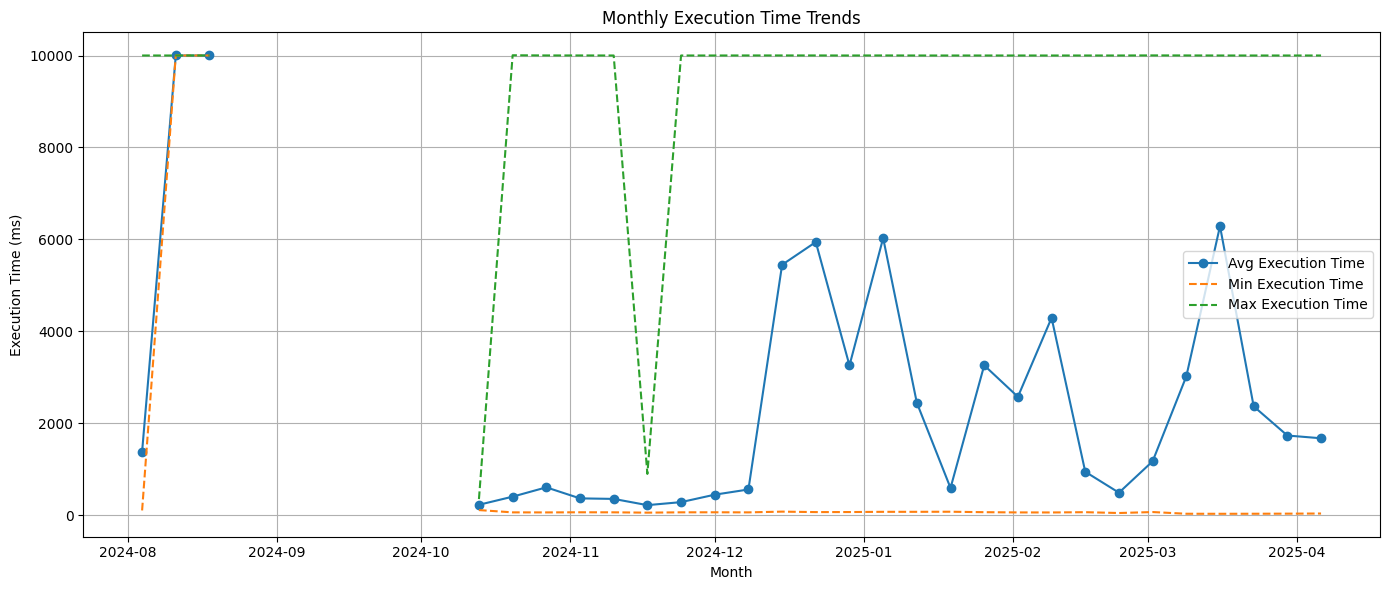

In [55]:


import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(time.index, time['avg_execution'], marker='o', label='Avg Execution Time')
plt.plot(time.index, time['min_execution'], linestyle='--', label='Min Execution Time')
plt.plot(time.index, time['max_execution'], linestyle='--', label='Max Execution Time')

plt.title("Monthly Execution Time Trends")
plt.xlabel("Month")
plt.ylabel("Execution Time (ms)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


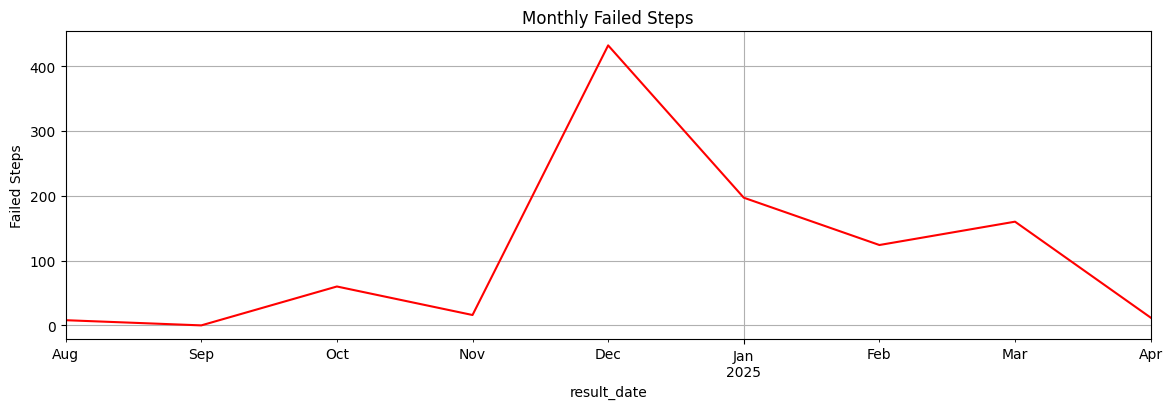

In [56]:
monthly['failures'].plot(kind='line', title='Monthly Failed Steps', ylabel='Failed Steps', figsize=(14, 4), color='red')
plt.grid(True)
plt.show()
